In [1]:
!pip install scikit-learn update

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib as jl

In [5]:
df=pd.read_excel(r"C:\Users\Bini\Desktop\ML-Data Bahir Dar.xlsx", sheet_name='Sheet1')
df

,cement_strengh_ class,cement_weight (kg/m3),max_ agg_ size (mm),slump (mm),water_weight (kg/m3),ca_ weight (kg/m3),fa_ weight (kg/m3),Age (days),compressive_ strength (MPa)
0,42.5,360.0,25.0,75.0,120.0,300.0,250.0,14,22.00
1,32.5,521.0,25.0,39.0,189.0,979.2,690.2,7,24.32
2,32.5,387.0,25.0,40.0,189.5,979.2,823.8,7,19.23
3,32.5,437.0,25.0,45.0,190.6,979.2,774.0,7,22.29
4,32.5,385.0,25.0,42.0,180.5,1062.8,747.1,28,33.10
...,...,...,...,...,...,...,...,...,...
291,32.5,410.0,28.0,40.0,170.3,992.8,702.8,28,32.53
292,32.5,415.0,28.0,37.0,168.4,992.8,702.8,28,40.60
293,32.5,443.0,28.0,36.1,164.4,992.8,690.4,28,54.59
294,42.5,410.0,28.0,37.0,170.3,992.8,756.7,28,39.80


In [6]:
corr_matrix=df.corr() 

In [7]:
corr_matrix

,cement_strengh_ class,cement_weight (kg/m3),max_ agg_ size (mm),slump (mm),water_weight (kg/m3),ca_ weight (kg/m3),fa_ weight (kg/m3),Age (days),compressive_ strength (MPa)
cement_strengh_ class,1.000000,0.163696,-0.073145,0.060631,-0.081826,-0.207567,-0.117780,0.022456,0.431415
cement_weight (kg/m3),0.163696,1.000000,0.070239,-0.003046,-0.027242,-0.236533,-0.210762,-0.007885,0.489073
max_ agg_ size (mm),-0.073145,0.070239,1.000000,0.048186,-0.105638,0.309599,-0.449606,-0.208916,-0.097944
slump (mm),0.060631,-0.003046,0.048186,1.000000,0.263192,-0.049159,0.018956,0.291162,-0.012543
water_weight (kg/m3),-0.081826,-0.027242,-0.105638,0.263192,1.000000,0.067066,0.262684,0.021123,-0.258792
ca_ weight (kg/m3),-0.207567,-0.236533,0.309599,-0.049159,0.067066,1.000000,-0.237345,-0.254010,-0.297623
fa_ weight (kg/m3),-0.117780,-0.210762,-0.449606,0.018956,0.262684,-0.237345,1.000000,0.215525,-0.149367
Age (days),0.022456,-0.007885,-0.208916,0.291162,0.021123,-0.254010,0.215525,1.000000,0.516163
compressive_ strength (MPa),0.431415,0.489073,-0.097944,-0.012543,-0.258792,-0.297623,-0.149367,0.516163,1.000000


In [8]:
data = df.to_numpy()
x = data[:,0:8] #Input features
y = data[:,8]   #Target

**R^2**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [11]:
model.score(x_test,y_test)

0.7044281236191311

In [12]:
y_test_mean=np.full(len(y_test), y_test.mean())

In [13]:
y_test.mean()

np.float64(32.13816666666666)

In [14]:
y_test_mean

array([32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667,
       32.13816667, 32.13816667, 32.13816667, 32.13816667, 32.13816667])

In [15]:
r2_score(y_test, y_test_mean)

0.0

In [16]:
r2_score(y_test,y_test)

1.0

In [17]:
y_pred=model.predict(x_test)
r2 = r2_score(y_test, y_pred)

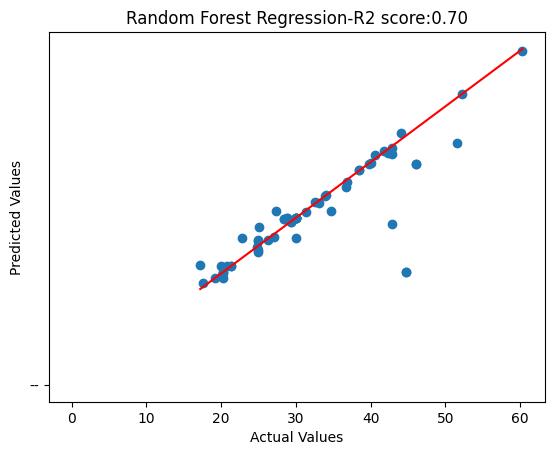

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Random Forest Regression-R2 score:{r2:.2f}')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], 'red' , '--')# identity line
plt.show()         


**Mean Absolut Error(MAE)**

In [19]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

np.float64(2.1404535555555526)

In [20]:
df=pd.DataFrame(data={"actual values": y_test,
                      "predicted values":y_preds})
df["difference"]=df["predicted values"]-df["actual values"]
df

,actual values,predicted values,difference
0,42.29,41.571200,-7.188000e-01
1,42.82,41.401300,-1.418700e+00
2,31.37,31.125500,-2.445000e-01
3,51.54,43.477350,-8.062650e+00
4,33.90,33.967400,6.740000e-02
5,29.30,29.307100,7.100000e-03
6,44.10,45.239100,1.139100e+00
7,27.35,31.217964,3.867964e+00
8,29.30,29.307100,7.100000e-03
9,25.04,28.324867,3.284867e+00


Mean Square Error (MSE)

In [21]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

np.float64(27.404306615511317)

In [22]:
# Calculate MSE by hand
squared = np.square(df["difference"])
squared

0     5.166734e-01
1     2.012710e+00
2     5.978025e-02
3     6.500633e+01
4     4.542760e-03
5     5.041000e-05
6     1.297549e+00
7     1.496115e+01
8     5.041000e-05
9     1.079035e+01
10    7.761610e-03
11    1.056250e-03
12    1.594405e-01
13    5.565160e-01
14    2.917264e-02
15    1.293651e+01
16    1.929904e+00
17    5.776000e-05
18    1.956293e-01
19    1.000000e-04
20    3.647693e-27
21    1.240474e+01
22    5.776000e-05
23    3.639709e-01
24    5.972551e+02
25    1.218154e+00
26    1.764000e-03
27    4.658062e-01
28    1.576782e+00
29    1.929904e+00
30    2.292494e-01
31    9.409000e-03
32    1.138062e+00
33    6.554522e-01
34    4.112657e+01
35    1.971356e+02
36    7.524049e-02
37    0.000000e+00
38    7.761610e-03
39    5.972551e+02
40    2.042041e+00
41    1.841449e-02
42    3.591605e-01
43    1.864883e-01
44    1.146398e+00
45    7.832250e-03
46    1.386269e+01
47    2.284840e-03
48    1.747684e-02
49    1.290965e-01
50    2.221093e-04
51    1.401146e+00
52    1.4544

In [23]:
# Calculate MSE by hand
squared = np.square(df["difference"])
squared.mean()

np.float64(27.404306615511317)

In [24]:
y_test_predict = model.predict(x_test)

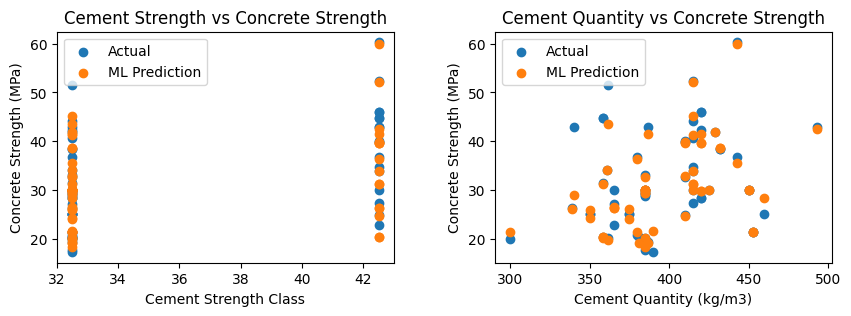

In [25]:
#creat subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

#Cement strength vs Concrete Strength
axes[0].scatter(x_test[:,0], y_test, label='Actual')
axes[0].scatter(x_test[:,0], y_test_predict, label='ML Prediction')
axes[0].set_xlabel('Cement Strength Class')
axes[0].set_ylabel('Concrete Strength (MPa)')
axes[0].set_title('Cement Strength vs Concrete Strength')
axes[0].legend()

#Cement quantity  vs Concrete Strength
axes[1].scatter(x_test[:,1], y_test, label='Actual')
axes[1].scatter(x_test[:,1], y_test_predict, label='ML Prediction')
axes[1].set_xlabel('Cement Quantity (kg/m3)')
axes[1].set_ylabel('Concrete Strength (MPa)')
axes[1].set_title('Cement Quantity vs Concrete Strength')
axes[1].legend()

#adjust spacing between subplots
fig.subplots_adjust(wspace=0.3)

#display plot
plt.show()

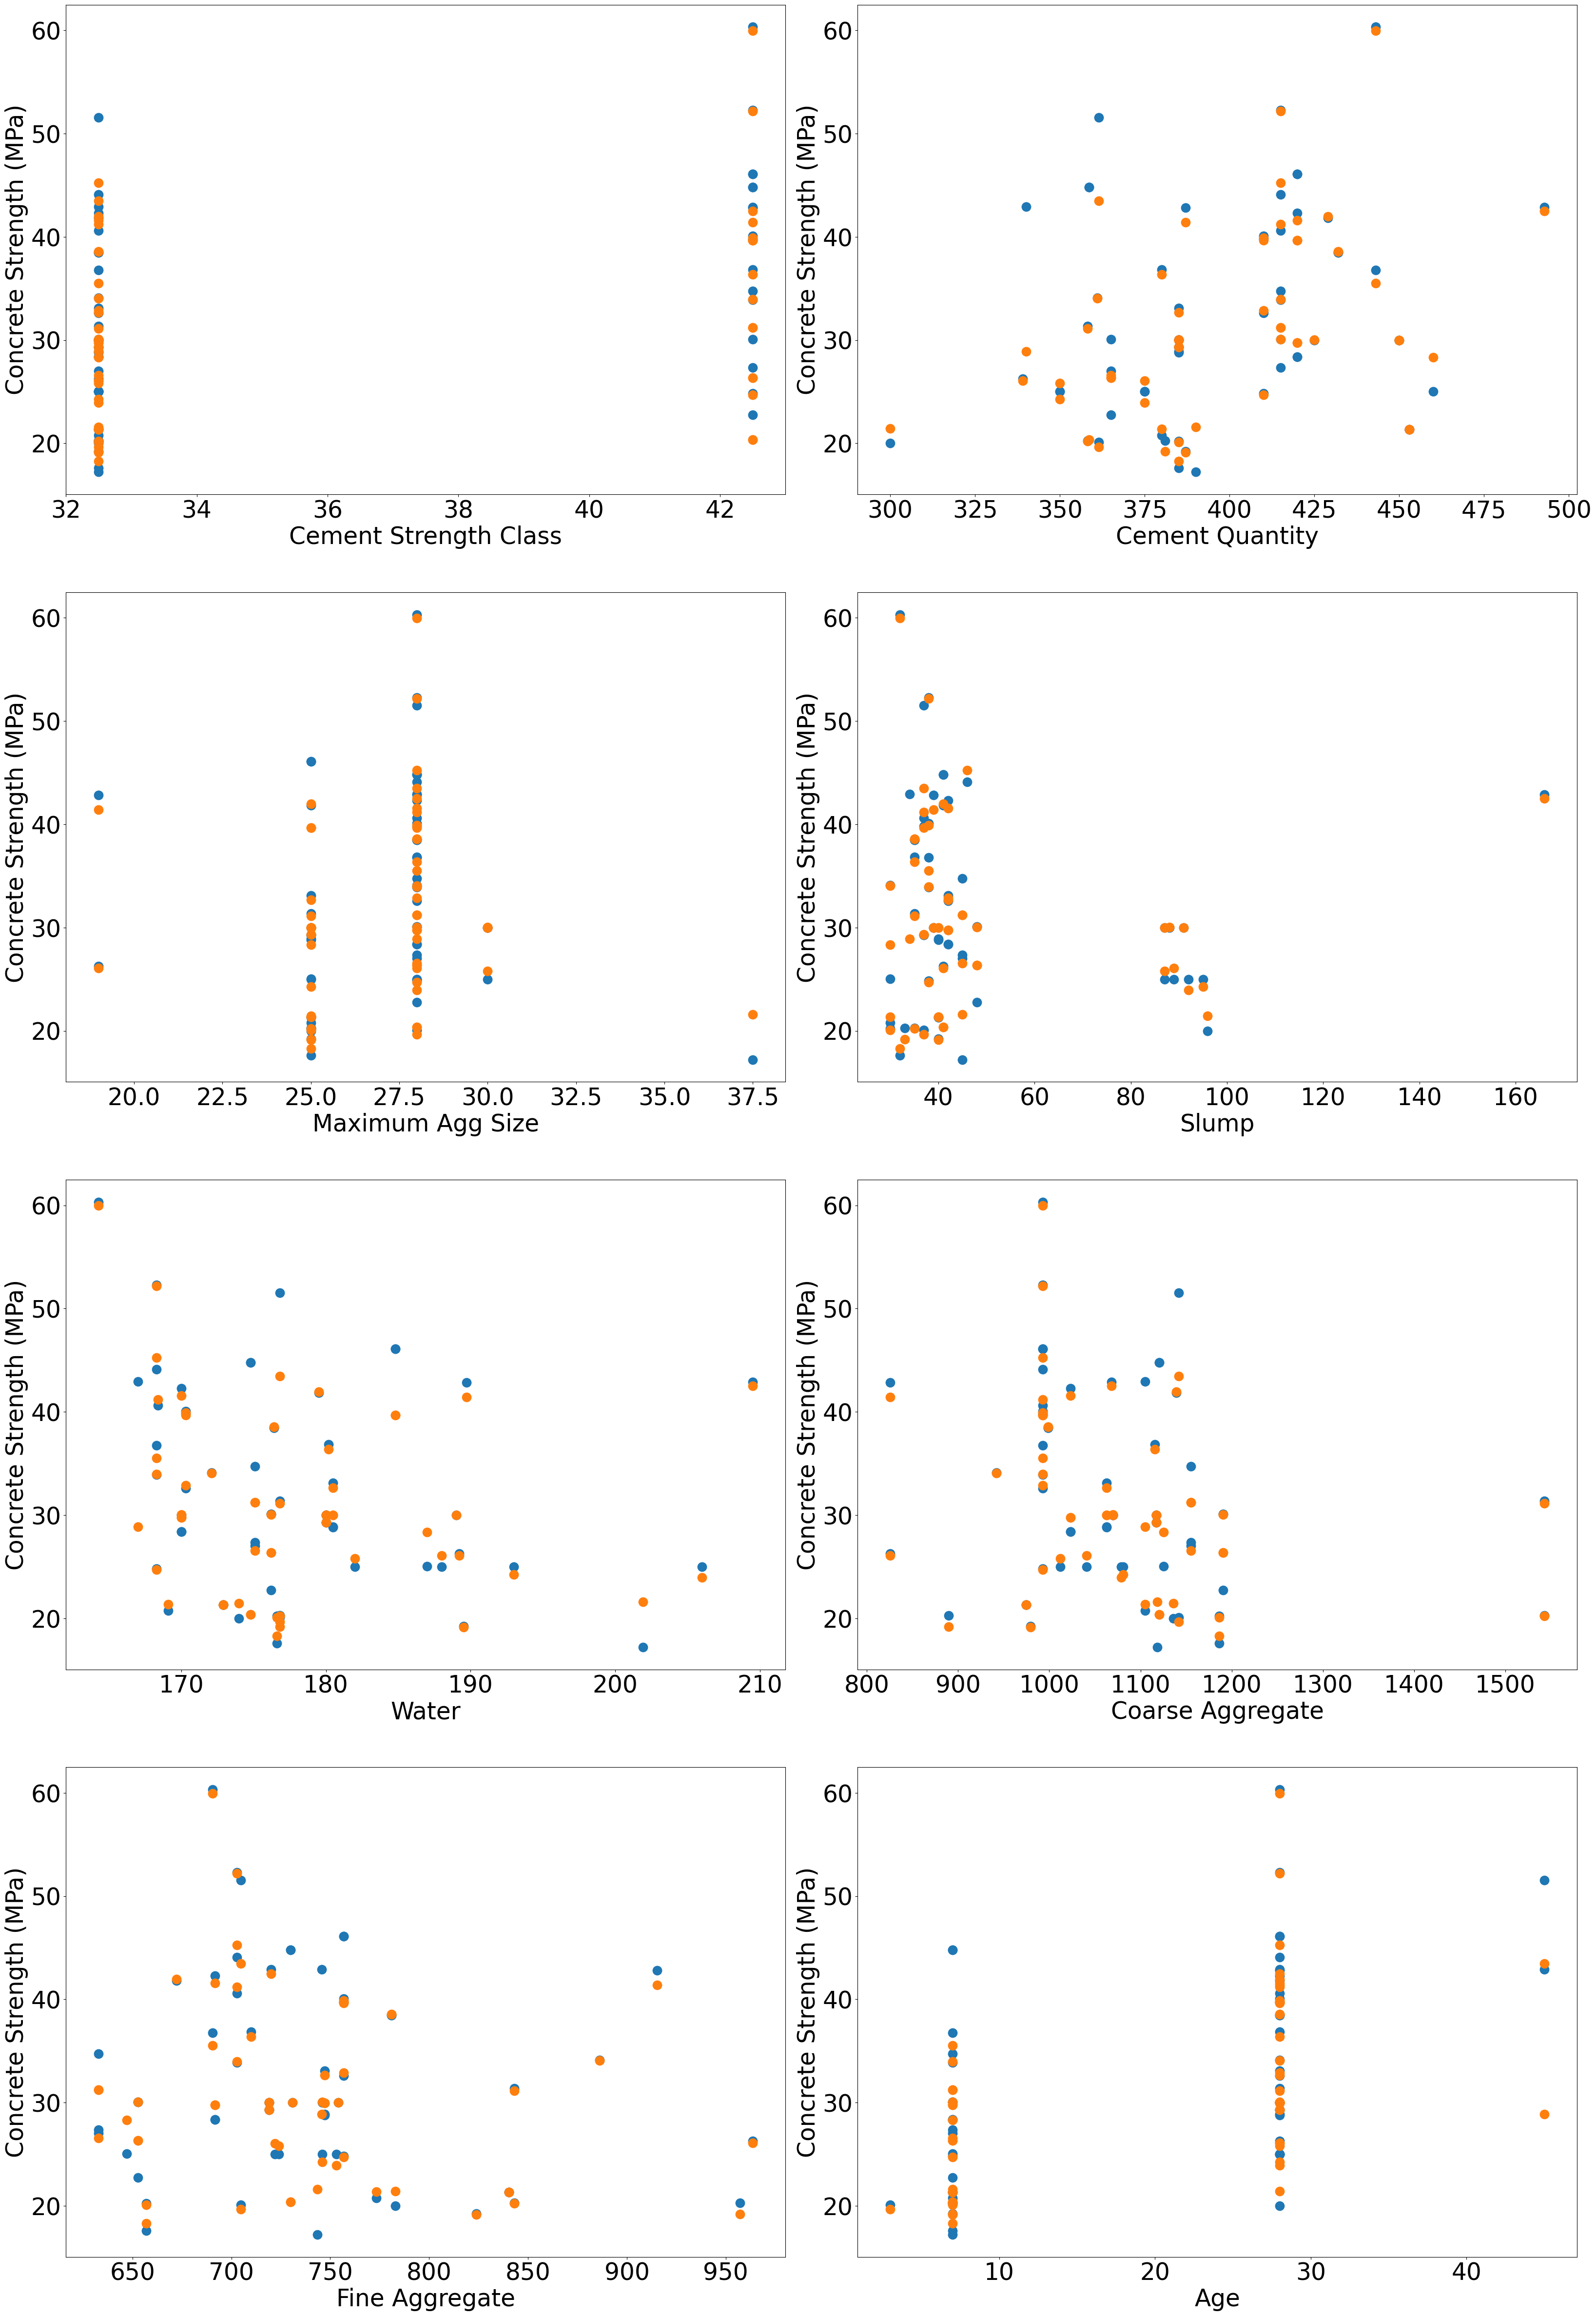

In [26]:
plt.rcParams.update({'font.size': 35}) #Update font sizes of all subplots in one go
fig, axes = plt.subplots(4, 2, figsize=(40, 60))

feature_title = ['Cement Strength Class',
                 'Cement Quantity',
                 'Maximum Agg Size',
                 'Slump',
                 'Water',
                 'Coarse Aggregate',
                 'Fine Aggregate',
                 'Age']

for row in range(0, axes.shape[0]):
    for col in range(0, axes.shape[1]):
        feature_id=row*axes.shape[1]+col
        axes[row,col].scatter(x_test[:,feature_id], y_test, s=175)
        axes[row,col].scatter(x_test[:,feature_id], y_test_predict, s=175)
        axes[row,col].set_xlabel(feature_title[feature_id])
        axes[row,col].set_ylabel('Concrete Strength (MPa)')

#adjust spacing between subplots
fig.subplots_adjust(wspace=0.1)

#display plot
plt.show()

In [27]:
model_filename ='concrete_Rdmreg_model.pkl'
jl.dump(model, model_filename)

['concrete_Rdmreg_model.pkl']